In [1]:
# ===== Include all needed libraries / packages =====


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ===== Import list of frequencies & dataframes from csv files =====


# Specify the directory where the CSV files are
directory = './output_csv_data/'

# Create a list of frequencies (int)
list_of_freq_mhz = np.arange(139, 146)

# Specify a list of all CSV filenames in the directory
csv_files = []
for freq_mhz in list_of_freq_mhz:
    csv_files = np.append(csv_files, 'data_' + str(freq_mhz) + 'mhz.csv')


# Create a list of DataFrames
list_of_dfs = [pd.read_csv(os.path.join(directory, f)) for f in csv_files]

In [3]:
# ===== Calculate efficiency on each frequency =====

list_of_eff = []

for index, fs in enumerate(list_of_dfs):
    eff = fs.Gain_Total_Linear_Weight.sum() / fs.Weight.sum()
    list_of_eff = np.append(list_of_eff, eff)

list_of_eff = list_of_eff * 100

In [4]:
# ===== Calculate efficiency (with Phaseshifter offset) on each frequency =====

list_of_eff_offset = []

for index, fs in enumerate(list_of_dfs):
    eff = fs.Gain_Total_Offset_Linear_Weight.sum() / fs.Weight.sum()
    list_of_eff_offset = np.append(list_of_eff_offset, eff)

list_of_eff_offset = list_of_eff_offset * 100

In [5]:
# Calculate Peak RHCP Gain on each frequency


list_of_peak_gain = np.zeros(len(list_of_dfs))

for index, df in enumerate(list_of_dfs):
    list_of_peak_gain[index] = np.max(df.Gain_RHCP)

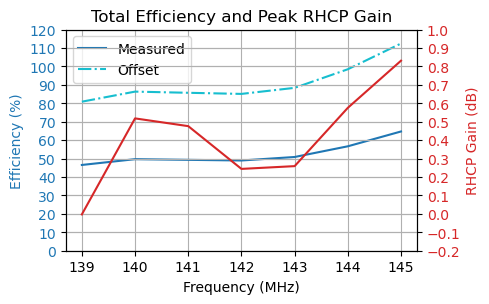

In [24]:
# ===== Plotting =====


x_axis_data = list_of_freq_mhz

fig, ax1 = plt.subplots(figsize=(5, 3))

color = 'tab:blue'
color2 = 'tab:cyan'
ax1.set_xlabel('Frequency (MHz)')
ax1.set_ylabel('Efficiency (%)', color=color)
ax1.plot(x_axis_data, list_of_eff, color=color, label='Measured')
ax1.plot(x_axis_data, list_of_eff_offset, color=color2, linestyle='-.', label='Offset')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yticks(np.linspace(0, 120, 13))
ax1.grid(True)
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('RHCP Gain (dB)', color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis_data, list_of_peak_gain, color=color, label='_RHCP Gain')
ax2.tick_params(axis='y', labelcolor=color)
ax2_ytick = np.linspace(-20, 100, 13)
ax2_ytick = ax2_ytick / 100
ax2.set_yticks(ax2_ytick)
ax2.grid(True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Total Efficiency and Peak RHCP Gain")

plt.savefig(("output_plot/total_efficiency_vs_peak_gain.pdf"), format='pdf', dpi=600)
plt.show()
